<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING

## Engenharia de Software

## Checkpoint 1 - Análise de dados de filmes lançados em anos pares, mas em meses ímpares, apartir de 1990

1.   Joao Pedro Borsato da Cruz - 550294
2.   Maria Fernanda Vieira de Camargo - 97956
3.   Pedro Lucas de Andrade Nunes - 550366


**Datasets usados**:
* Netflix: https://www.kaggle.com/datasets/shivamb/netflix-shows/data
* Disney+: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows/data
* Amazon Prime Video: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows
* Rotten Tomatoes: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/data
* Oscar: https://www.kaggle.com/datasets/unanimad/the-oscar-award


### Preparação e filtragem dos datasets para as análises
Primeiro importamos todas as bibliotecas que serão usadas no decorrer do projeto, que são Pandas, Numpy, Seaborn e Matplotlib.pyplot.

Depois, criamos variáveis para cada dataset que será usado. Os datasets usados são: 'rotten_tomatoes_movies.csv'; 'rotten_tomatoes_critic_reviews.csv'; 'the_oscar_award.csv'; 'amazon_prime_titles.csv'; 'disney_plus_titles.csv'; 'netflix_titles.csv' e 'All Time Worldwide Box Office.csv'.

Como os datasets dos serviços de streaming (Amazon Prime Video, Disney+ e Netflix) tinham séries além de filmes, filtramos as variáveis para conter apenas filmes.

Após a filtragem inicial, combinamos todos os datasets usando o comando 'pd.merge'.

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
movies_df = pd.read_csv('rotten_tomatoes_movies.csv')
reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
oscar_df = pd.read_csv('the_oscar_award.csv')
amazon_df = pd.read_csv('amazon_prime_titles.csv')
disney_df = pd.read_csv('disney_plus_titles.csv')
netflix_df = pd.read_csv('netflix_titles.csv')
bilheteria_df = pd.read_csv('All Time Worldwide Box Office.csv')

In [6]:
amazon_df = amazon_df[amazon_df['type'] != 'TV Show']
disney_df = disney_df[disney_df['type'] != 'TV Show']
netflix_df = netflix_df[netflix_df['type'] != 'TV Show']

combinado = pd.merge(movies_df, reviews_df, on='rotten_tomatoes_link')
combinado = pd.merge(combinado, oscar_df, left_on='movie_title', right_on='film', how='left')
combinado = pd.merge(combinado, amazon_df, left_on='movie_title', right_on='title',how='left')
combinado = pd.merge(combinado, disney_df, left_on='movie_title', right_on='title',how='left')
combinado = pd.merge(combinado, netflix_df, left_on='movie_title', right_on='title',how='left')
combinado = pd.merge(combinado, bilheteria_df, left_on='movie_title', right_on ='Movie',how='left')

In [7]:
combinado['original_release_date'] = pd.to_datetime(combinado['original_release_date'], errors='coerce')

combinado['year'] = combinado['original_release_date'].dt.year
combinado['month'] = combinado['original_release_date'].dt.month

filtro = combinado[(combinado['year'] >= 1990) &
                    (combinado['year'] % 2 == 0) &
                    (combinado['month']% 2 != 0)]

filtro = filtro.drop_duplicates(subset=['movie_title', 'original_release_date'])

filtro[['movie_title', 'original_release_date']].sample(n=15, random_state=42)

,movie_title,original_release_date
1203030,Show Dogs,2018-05-18
1343759,Swimfan,2002-09-06
1033276,Purple Butterfly (Zi hudie),2004-11-26
453564,Darkon,2006-03-11
109031,See No Evil,2006-05-19
1200730,Shoot to Marry,2020-01-26
1413933,The Forbidden Dance,1990-03-16
1359729,That Awkward Moment,2014-01-31
64549,Barcelona,1994-07-29
101314,Almost Peaceful,2004-05-01


### **Análise 01:** Filmes Criados no Sudeste Asiático ou no Subcontinente Indiano
Para realizar esta análise, começamos criando uma lista chamada `paises_lat` contendo os países da América Latina que desejamos considerar. Esses países incluem Argentina, Bolívia, Brasil, Chile, Colômbia, Costa Rica, Cuba, Equador, El Salvador, Guatemala, Haiti, Honduras, México, Nicarágua, Panamá, Paraguai, Peru, República Dominicana, Uruguai e Venezuela.

Em seguida, aplicamos um filtro à variável `filtro`, que contém todos os filmes dentro do escopo escolhido. Usamos o método `str.contains` para selecionar apenas os filmes cujos países de origem estão na lista `paises_lat`. O parâmetro `case=False` garante que a filtragem não seja sensível a maiúsculas ou minúsculas, e `na=False` trata os valores ausentes como não correspondentes.

Após a filtragem, geramos uma lista com os títulos e países dos filmes resultantes, eliminando duplicatas para garantir que cada filme apareça apenas uma vez na listagem.

Finalmente, mostramos a lista filtrada de filmes da América Latina, com os títulos e países correspondentes, permitindo uma visão clara dos filmes produzidos nesses países.


In [8]:
paises_sudeste = ['Indonesia', 'Malaysia', 'Phillippines', 'Singapure', 'Thailand', 'Brunei', 'Vietnam', 'Myanmar', 'Laos', 'Cambodia']
paises_subcontinente = ['India', 'Pakistan', 'Sri Lanka', 'Nepal']
filmes_sud = filtro[filtro['country'].isin(paises_sudeste)]
filmes_sud_aleatorios = filmes_sud[['movie_title', 'country']].drop_duplicates()

print(filmes_sud_aleatorios)

       movie_title    country
9096       Shutter   Thailand
641219    Headshot  Indonesia


In [9]:
paises_subcontinente = ['India', 'Pakistan', 'Sri Lanka', 'Nepal']
filmes_sub = filtro[filtro['country'].isin(paises_subcontinente)]
filmes_sub_aleatorios = filmes_sub[['movie_title', 'country']].drop_duplicates()

print(filmes_sub_aleatorios)

            movie_title country
110935            Bobby   India
183275   Action Replayy   India
273411           Barfi!   India
346993    Break Ke Baad   India
581916           Gemini   India
626958        Guzaarish   India
1050465    Rajma Chawal   India
1348566         Talaash   India


## **Análise 02:** Filmes que concoreram ao oscar na categoria Best Makeup and Hairstyling
Para fazer essa análise, filtramos o dataset usando as palavras 'MAKEUP'e 'MAKEUP AND HAIRSTYLING'.

A lista de filmes vencedores será exibida em um formato tabular, mostrando os seguintes campos:

Título do Filme
Data de Lançamento
Categoria Vencida
Essa análise ajuda a identificar rapidamente quais filmes se destacaram nas categorias de maquiagem e penteados ao longo dos anos, fornecendo uma visão clara de quantos e quais filmes ganharam esses prêmios.

In [10]:
makeup_winners_filtered = filtro[((filtro['category'].str.contains('MAKEUP', case=False, na=False)) |
                                  (filtro['category'].str.contains('MAKEUP AND HAIRSTYLING', case=False, na=False)))]

makeup_winners_filtered_display = makeup_winners_filtered[['movie_title', 'original_release_date', 'category']].drop_duplicates(subset=['movie_title'])

# Formatação mais amigável
print(f"Total de vencedores nas categorias 'MAKEUP' ou 'MAKEUP AND HAIRSTYLING' após filtro de data: {len(makeup_winners_filtered_display)}")
print(makeup_winners_filtered_display.to_string(index=False))

Total de vencedores nas categorias 'MAKEUP' ou 'MAKEUP AND HAIRSTYLING' após filtro de data: 5
                movie_title original_release_date               category
                  Hitchcock            2012-11-23 MAKEUP AND HAIRSTYLING
Mary Shelley's Frankenstein            1994-11-04                 MAKEUP
           Star Trek Beyond            2016-07-22 MAKEUP AND HAIRSTYLING
   Star Trek: First Contact            1996-11-22                 MAKEUP
               The Way Back            2020-03-06                 MAKEUP





### **Análise 03:** Filmes Criados na América Latina

Este código tem como objetivo filtrar e exibir uma lista de filmes produzidos em países da América Latina. O processo é dividido em algumas etapas principais:


In [ ]:
paises_lat = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia','Costa Rica', 'Cuba', 'Ecuador', 'El Salvador', 'Guatemala','Haiti', 'Honduras', 'Mexico', 'Nicaragua', 'Panama',
              'Paraguay', 'Peru', 'Dominican Republic', 'Uruguay', 'Venezuela']
filmes_lat = filtro[filtro['country'].str.contains('|'.join(paises_lat), case = False, na=False)]
filmes_lat_aleatorios = filmes_lat[['movie_title', 'country']].drop_duplicates()

print(filmes_lat_aleatorios)

               movie_title                                country
507519               Elena                  Brazil, United States
819029          Little Men          United States, Greece, Brazil
863538   The Mask of Zorro         United States, Germany, Mexico
1078975           Remember  Canada, Mexico, Germany, South Africa


### **Análise 04:** Filmes com número ímpar de palavras no título, mas a maior palavra tem um número par de letras

In [11]:
def contar_palavras(titulo):
    return len(titulo.split())

def maior_palavra(titulo):
    palavras = titulo.split()
    if palavras:
        return max(palavras, key=len)
    return ''

def tem_maior_palavra_par(titulo):
    maior_palavra_titulo = maior_palavra(titulo)
    return len(maior_palavra_titulo) % 2 == 0

filtro['numero_palavras'] = filtro['movie_title'].apply(contar_palavras)
filtro['maior_palavra_par'] = filtro['movie_title'].apply(tem_maior_palavra_par)

# Filtrar filmes com número ímpar de palavras no título e a maior palavra tem um número par de letras
filmes_filtrados = filtro[(filtro['numero_palavras'] % 2 != 0) & (filtro['maior_palavra_par'])]

filmes_aleatorios = filmes_filtrados[['movie_title', 'numero_palavras']].drop_duplicates().sample(n=15, random_state=42)

print(filmes_aleatorios)

                     movie_title  numero_palavras
1130353            Run This Town                3
337438                    Bonsái                1
118904                  Hounddog                1
329068                BloodRayne                1
511843           End of Sentence                3
602210   Godzilla vs. Megaguirus                3
1650875           Romeo + Juliet                3
153424                   50 to 1                3
957880           On Chesil Beach                3
1457539        The King's Speech                3
782734                  Ladybugs                1
504397                        Ed                1
732599                Jessabelle                1
76300                   Whatever                1
668704              How She Move                3


### **Análise 05:** Filmes de Maior Bilheteria Mundial e Suas Avaliações do Público


Este gráfico de barras apresenta os 15 filmes de maior bilheteria mundial, junto com suas respectivas avaliações pelo público (Audience Rating).

### Detalhes do Gráfico:
- **Bilheteria Mundial**: O eixo X exibe a bilheteria mundial para cada filme, representando o sucesso comercial dos títulos.
- **Títulos dos Filmes**: O eixo Y mostra os títulos dos filmes, ordenados pela bilheteria em ordem decrescente.
- **Avaliações do Público**: A cor das barras é baseada na avaliação do público, conforme a escala do `Audience Rating`, com uma paleta de cores (`viridis`) que ajuda a identificar visualmente os filmes com melhores ou piores avaliações.

- **Análise de Sucesso Comercial**: Este gráfico permite analisar quais filmes obtiveram maior sucesso comercial, destacando aqueles que arrecadaram mais nas bilheterias globais.
- **Correlação com Avaliações do Público**: A coloração das barras, baseada na avaliação do público, facilita a identificação de filmes que, além de terem sido sucessos de bilheteria, também receberam boas notas. Assim, é possível observar se filmes altamente lucrativos também foram bem avaliados pelo público ou se há uma discrepância entre popularidade e qualidade percebida.
- **Comparação Visual**: Filmes com notas mais altas têm uma tonalidade mais escura, enquanto os filmes com notas menores tendem a cores mais claras. Isso proporciona uma análise visual clara de como a avaliação do público varia em relação ao sucesso de bilheteria.

Este gráfico oferece uma maneira eficiente de visualizar a relação entre sucesso financeiro e aceitação do público. Ele revela como filmes que obtiveram grande sucesso comercial também foram recebidos em termos de qualidade pelo público, permitindo analisar possíveis discrepâncias entre popularidade e crítica popular.

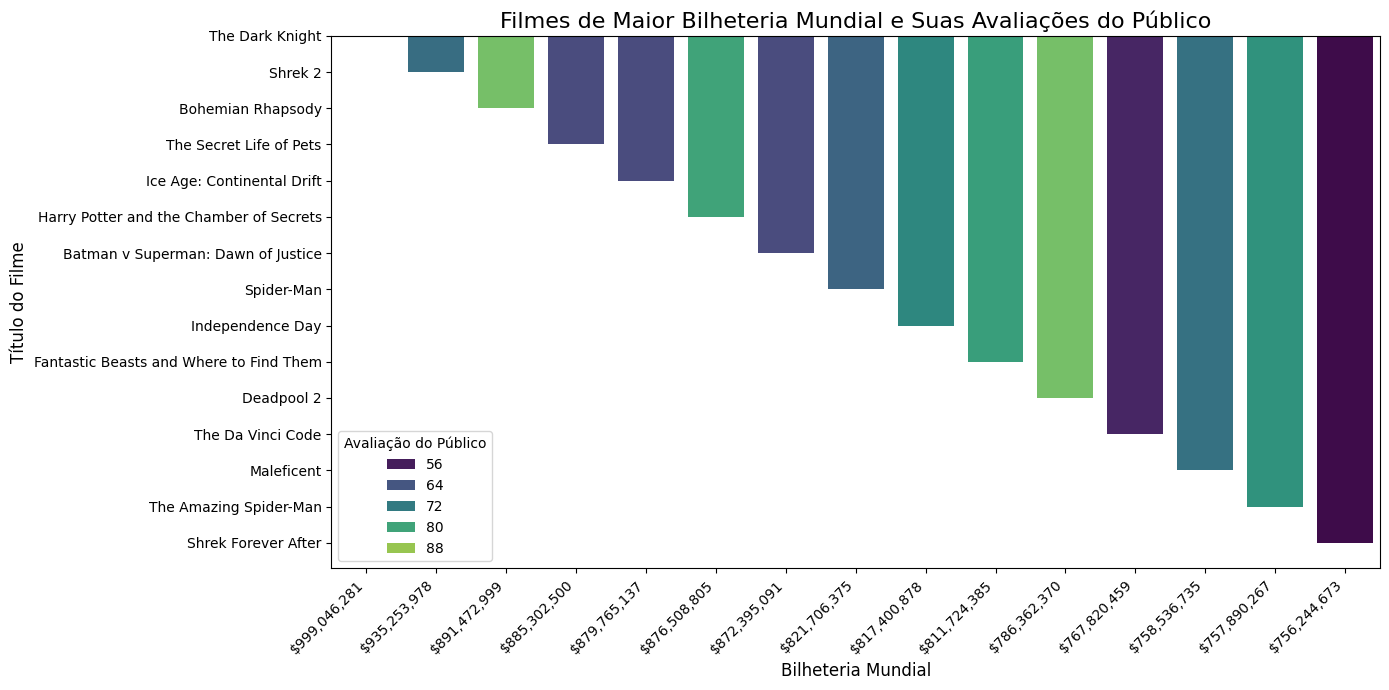

In [12]:
bilheteria = filtro[['movie_title', 'WorldwideBox Office', 'audience_rating']].dropna().sort_values(by='WorldwideBox Office', ascending=False).head(15)

plt.figure(figsize=(14,7))
sns.barplot(data=bilheteria, x='WorldwideBox Office', y='movie_title', hue='audience_rating', palette='viridis')
plt.title('Filmes de Maior Bilheteria Mundial e Suas Avaliações do Público', fontsize=16)
plt.xlabel('Bilheteria Mundial', fontsize=12)
plt.ylabel('Título do Filme', fontsize =12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Avaliação do Público')
plt.tight_layout()
plt.show()

### **Análise 06:** Comparação das Avaliações dos Críticos e Público por Gênero

### Detalhes do Gráfico:
- **Gêneros**: No eixo X, temos os gêneros de filmes mais populares, selecionados com base na frequência no dataset.
- **Avaliações**: No eixo Y, estão as avaliações, variando de 0 a 100.
- **Gráficos de Violino**: O gráfico de violino mostra a distribuição das notas dos críticos e do público para cada gênero.
  - As avaliações dos **críticos** estão representadas em azul claro.
  - As avaliações do **público** estão representadas em vermelho claro (salmon).
  - As distribuições são sobrepostas para facilitar a comparação entre as notas dos críticos e do público para o mesmo gênero.

- **Comparação Visual**: O gráfico permite observar a diferença nas distribuições das notas entre críticos e público.
  - Para gêneros específicos, as distribuições podem ser semelhantes, sugerindo que ambos, público e críticos, avaliam os filmes de maneira parecida.
  - Em outros casos, pode haver uma diferença maior, mostrando que os críticos podem ser mais exigentes ou, ao contrário, mais generosos que o público em relação a determinado gênero.
- **Distribuição**: As áreas mais largas dos gráficos de violino indicam maior concentração de filmes recebendo avaliações naquela faixa de nota. Já as áreas mais finas indicam menor concentração de notas naquela faixa.

Este gráfico fornece uma análise rica sobre as divergências e convergências nas avaliações de críticos e público por gênero. Gêneros que apresentam distribuições muito diferentes entre as duas opiniões indicam uma discrepância clara nas percepções.

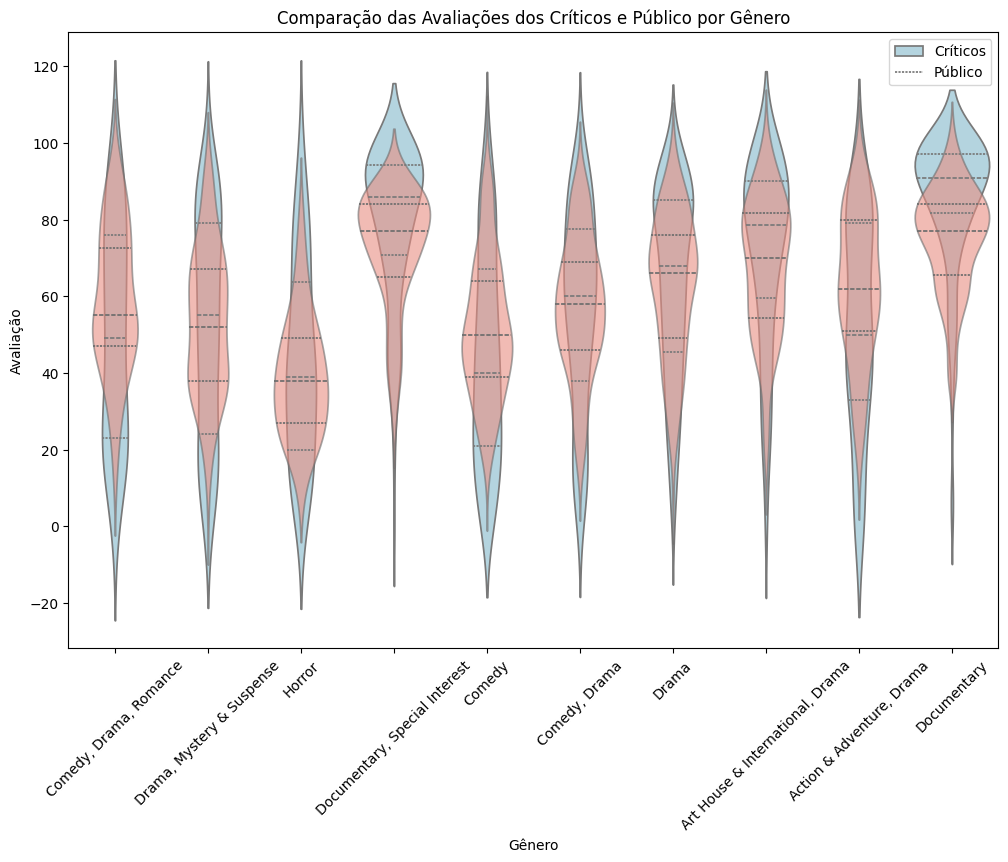

In [13]:
genero_mais_frequente = filtro['genres'].value_counts().nlargest(10).index

filtro_generos_limitados = filtro[filtro['genres'].isin(genero_mais_frequente)]

plt.figure(figsize=(12, 8))

sns.violinplot(x='genres', y='tomatometer_rating', data=filtro_generos_limitados, inner='quartile', color='lightblue')
sns.violinplot(x='genres', y='audience_rating', data=filtro_generos_limitados, inner='quartile', color='salmon', alpha=0.6)

plt.title('Comparação das Avaliações dos Críticos e Público por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Avaliação')
plt.xticks(rotation=45)
plt.legend(['Críticos', 'Público'], loc='upper right')
plt.show()

amostra_dados = filtro_generos_limitados.head(100)
amostra_dados.to_csv('amostra_dados.csv', index=False)

### **Análise 07:** Correlação entre Avaliações dos Críticos e do Público

### Detalhes do Gráfico:
- **Eixo X (Avaliação dos Críticos)**: No eixo horizontal, temos as notas dadas pelos críticos, variando de 0 a 100.
- **Eixo Y (Avaliação do Público)**: No eixo vertical, são representadas as avaliações do público, também numa escala de 0 a 100.
- **Pontos de Dispersão**: Cada ponto no gráfico representa um filme. A posição de cada ponto indica a avaliação que ele recebeu tanto dos críticos quanto do público. A transparência dos pontos (alpha=0.5) ajuda a visualizar melhor a densidade de pontos sobrepostos.
- **Título**: O título do gráfico "Correlação entre Avaliações dos Críticos e do Público" indica que o objetivo do gráfico é visualizar se há algum padrão de correlação entre as duas avaliações.

- **Correlação**: A correlação entre as duas variáveis foi calculada como **{correlacao:.2f}**, o que indica uma relação **moderada** (entre 0 e 1) entre as avaliações dos críticos e do público.
- **Distribuição**: O gráfico sugere que, em geral, há uma tendência de concordância entre as avaliações, já que os pontos se distribuem próximos a uma linha diagonal crescente. Contudo, há exceções, onde filmes podem ser bem avaliados pelo público e mal avaliados pelos críticos, ou vice-versa.

Este gráfico permite identificar a existência de uma correlação moderada entre as opiniões dos críticos e do público. Através da visualização, podemos entender melhor em quais casos as opiniões se alinham e quando há divergências.

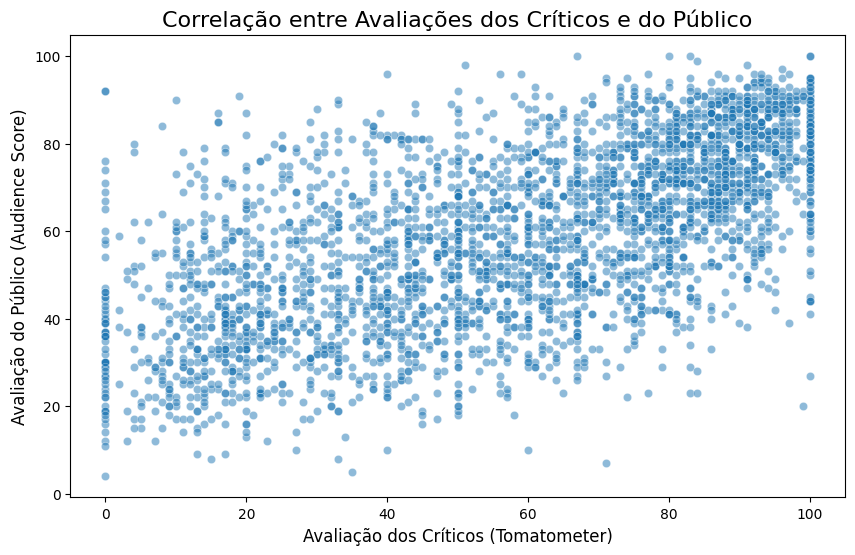

Correlação entre Avaliações dos Críticos e do Público: 0.61


In [14]:
avaliacoes = filtro[['tomatometer_rating', 'audience_rating']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=avaliacoes, x='tomatometer_rating', y='audience_rating', alpha=0.5)

plt.title('Correlação entre Avaliações dos Críticos e do Público', fontsize=16)
plt.xlabel('Avaliação dos Críticos (Tomatometer)', fontsize=12)
plt.ylabel('Avaliação do Público (Audience Score)', fontsize=12)

plt.show()

correlacao = avaliacoes['tomatometer_rating'].corr(avaliacoes['audience_rating'])
print(f"Correlação entre Avaliações dos Críticos e do Público: {correlacao:.2f}")

### **Análise 08:** Distribuição dos Gêneros Mais Populares de Filmes

Este gráfico de barras ilustra a distribuição dos gêneros de filmes mais populares no dataset, destacando os 15 gêneros mais frequentes.

### Detalhes do Gráfico:
- **Eixo X (Número de Filmes)**: O eixo horizontal mostra a quantidade de filmes para cada um dos gêneros mais populares.
- **Eixo Y (Gênero)**: O eixo vertical apresenta os gêneros dos filmes, ordenados conforme a frequência no dataset.
- **Barras**: Cada barra representa um gênero de filme, com o comprimento da barra indicando o número de filmes pertencentes a esse gênero.
- **Título**: O título "Distribuição dos Gêneros Mais Populares de Filmes" informa que o gráfico exibe os gêneros mais recorrentes no dataset.

O gráfico revela quais gêneros são mais frequentemente representados no conjunto de dados. Gêneros com barras mais longas, como "Drama" e "Comédia", possuem uma maior quantidade de filmes em comparação com gêneros cujas barras são mais curtas.

Este gráfico é útil para identificar os gêneros de filmes que dominam o dataset, o que pode ser uma indicação de tendências na produção de filmes ou na preferência do público e da crítica. Ao entender essa distribuição, é possível realizar análises mais detalhadas sobre o desempenho ou recepção dos filmes em diferentes gêneros.

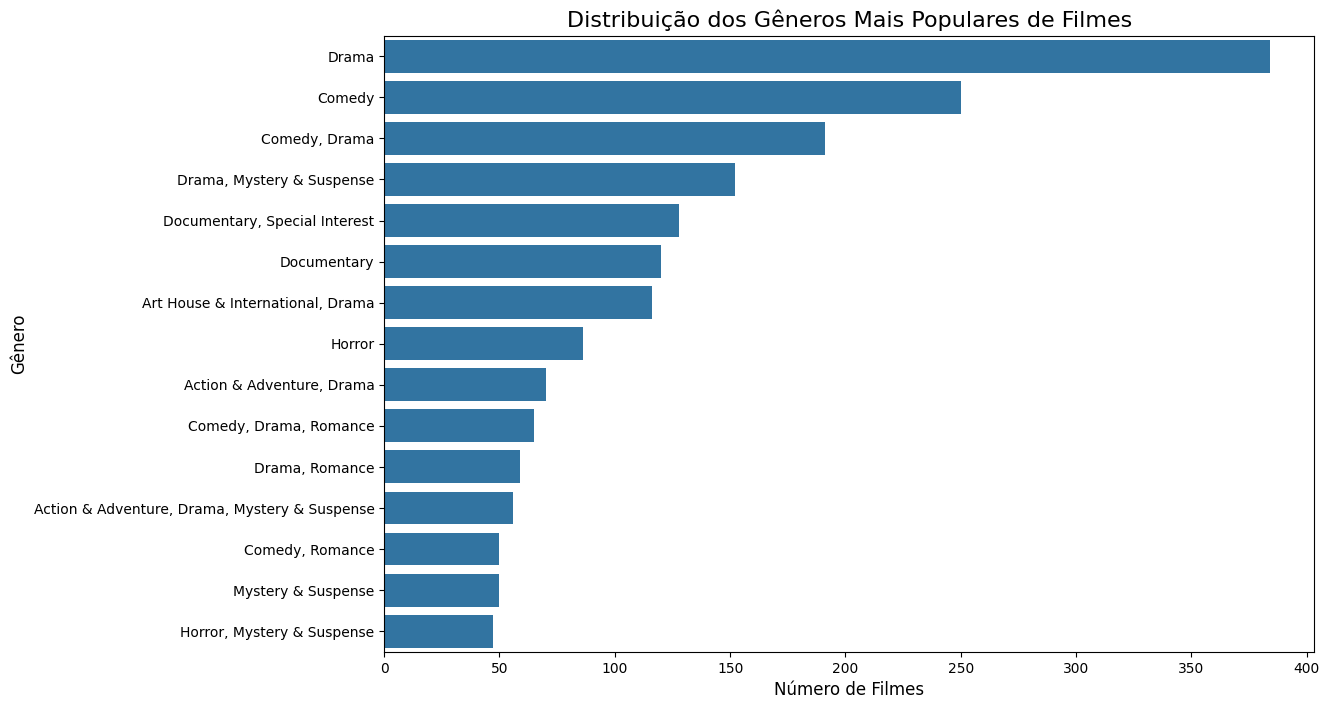

In [15]:
top_genera = filtro['genres'].value_counts().nlargest(15).index

filtro_populares = filtro[filtro['genres'].isin(top_genera)]

plt.figure(figsize=(12, 8))
sns.countplot(data=filtro_populares, y='genres', order=top_genera)
plt.title('Distribuição dos Gêneros Mais Populares de Filmes', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.show()

### **Análise 09:** Avaliações Média dos Críticos e do Público ao Longo dos Anos

Este gráfico de linhas apresenta a evolução das avaliações médias de filmes tanto pelos críticos quanto pelo público ao longo dos anos. As avaliações foram agrupadas por ano e calculadas com base nas médias das notas de críticos e público presentes no dataset.

### Detalhes do Gráfico:
- **Eixo X (Ano)**: O eixo horizontal representa os anos de lançamento dos filmes presentes no dataset.
- **Eixo Y (Avaliação Média)**: O eixo vertical mostra as avaliações médias em uma escala de 0 a 100, tanto para críticos quanto para o público.
- **Linhas**:
  - A **linha azul** representa as avaliações médias dos **críticos** (tomatometer).
  - A **linha laranja** representa as avaliações médias do **público**.
- **Legenda**: A legenda identifica cada linha como sendo a avaliação de "Críticos" ou "Público".
- **Título**: O título "Avaliações Média dos Críticos e do Público ao Longo dos Anos" indica que o gráfico compara como as avaliações desses dois grupos variaram ao longo do tempo.

A partir do gráfico, é possível visualizar as tendências nas avaliações médias de críticos e público para filmes lançados em diferentes anos. Se as duas linhas apresentarem uma trajetória similar, isso indica uma concordância nas opiniões ao longo do tempo. Caso haja divergências, isso sugere que certos períodos tiveram diferenças significativas na forma como críticos e público avaliaram os filmes.

Este gráfico permite comparar de maneira clara as avaliações dos críticos e do público, ajudando a identificar períodos de maior convergência ou divergência de opiniões ao longo dos anos. Essa análise pode ser interessante para entender como a recepção de filmes evolui em diferentes épocas.

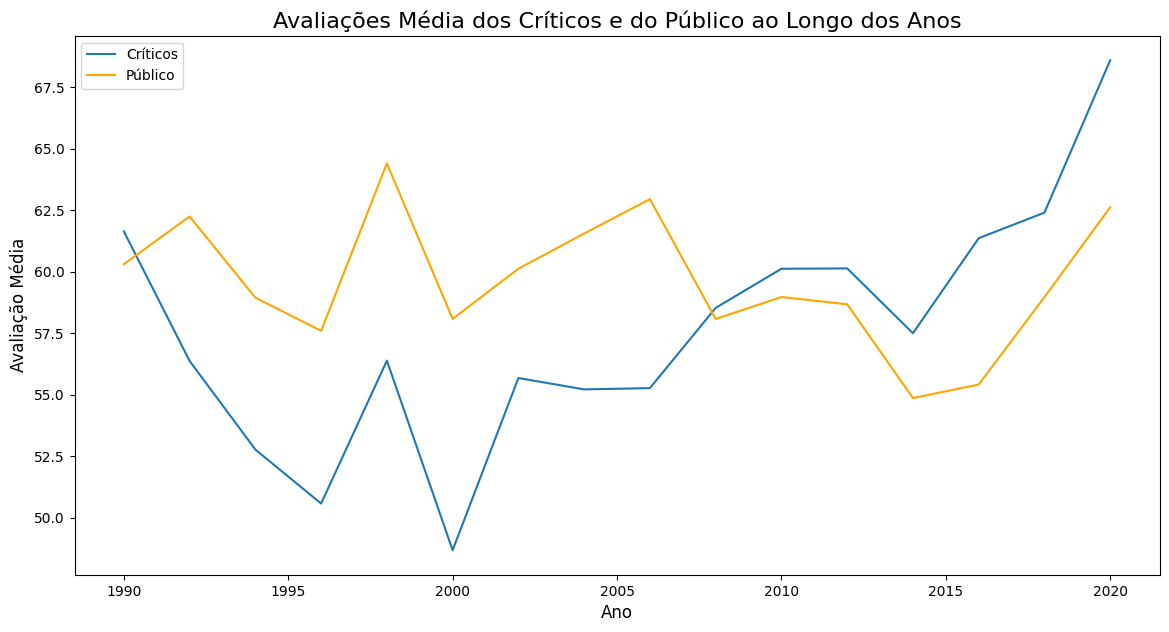

In [16]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtro.groupby('year').agg({
    'tomatometer_rating': 'mean',
    'audience_rating': 'mean'
}).reset_index(), x='year', y='tomatometer_rating', label='Críticos')
sns.lineplot(data=filtro.groupby('year').agg({
    'tomatometer_rating': 'mean',
    'audience_rating': 'mean'
}).reset_index(), x='year', y='audience_rating', label='Público', color='orange')
plt.title('Avaliações Média dos Críticos e do Público ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Avaliação Média', fontsize=12)
plt.legend()
plt.show()

### **Análise 10:** Países com o maior número de produções

Este gráfico de barras exibe a contagem de filmes por país para os 10 países que mais produzem filmes no dataset. A análise foi feita com base na coluna `country`, onde extraímos os 10 países com o maior número de filmes.

### Detalhes do Gráfico:
- **Eixo Y (Países)**: No eixo vertical, temos os 10 países que lideram em termos de número de filmes produzidos.
- **Eixo X (Número de Filmes)**: No eixo horizontal, temos a quantidade de filmes para cada um desses países.
- **Paleta de Cores**: A paleta de cores utilizada foi `viridis`, que oferece uma variação suave de cores, facilitando a distinção visual entre os países.
- **Título**: O gráfico é intitulado "Número de Filmes por País (Top 10)", o que reflete a visualização das contagens de filmes apenas para os países com as maiores produções cinematográficas.

A partir desse gráfico, podemos identificar rapidamente quais países possuem as maiores produções de filmes. Isso pode ser útil para entender a dominância de certos mercados cinematográficos, além de fornecer uma visão clara de quais regiões contribuem mais para a indústria global de filmes.

Este gráfico oferece uma visão geral da distribuição de filmes entre os principais países. Países como os **Estados Unidos** lideram em termos de número de produções, seguidos de outras potências cinematográficas como **Reino Unido** e **França**.

C:\Users\pluca\AppData\Local\Temp\ipykernel_22732\2492709468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtro_top_countries, y='country', order=top_countries, palette='viridis')


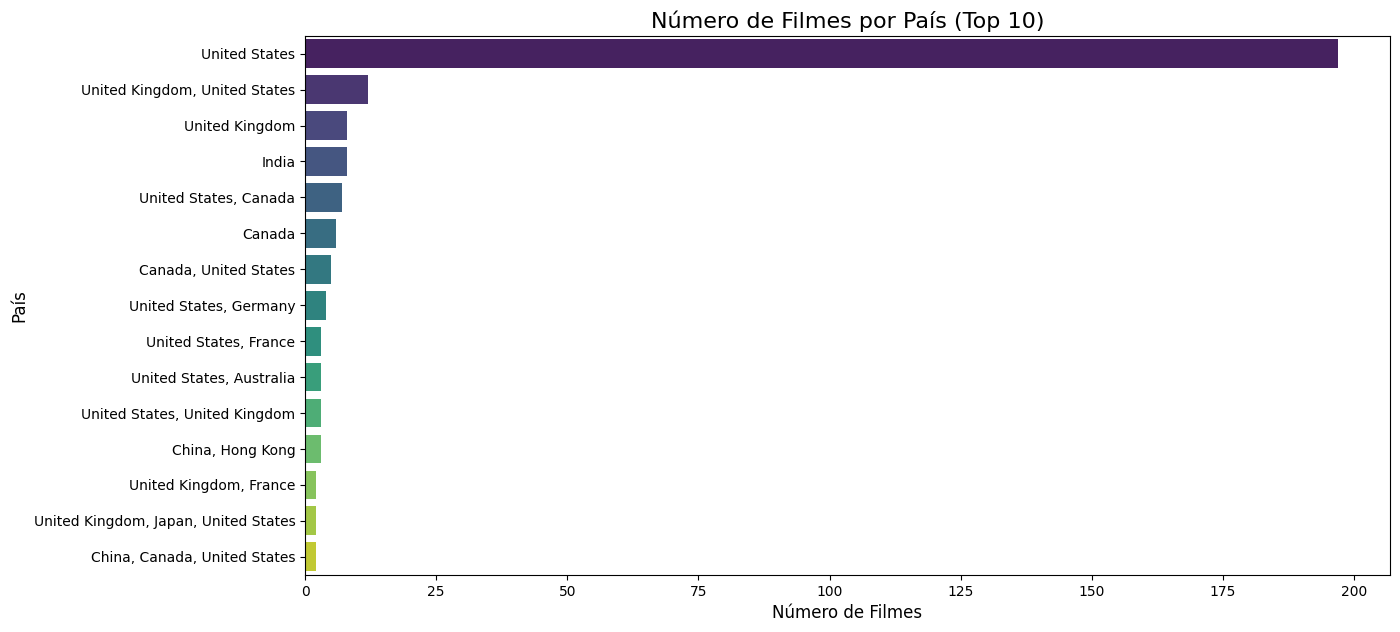

In [17]:

top_countries = filtro['country'].value_counts().head(15).index

filtro_top_countries = filtro[filtro['country'].isin(top_countries)]

plt.figure(figsize=(14, 7))
sns.countplot(data=filtro_top_countries, y='country', order=top_countries, palette='viridis')
plt.title('Número de Filmes por País (Top 10)', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.show()



### **Conclusão Final:**

## Conclusão do Projeto

Este projeto proporcionou uma análise aprofundada de diversos aspectos da indústria cinematográfica, revelando tendências significativas nas avaliações de filmes e suas características. Ao examinar a distribuição dos gêneros mais populares, observamos como certas categorias dominam o mercado, refletindo as preferências do público e as estratégias de produção. A comparação das avaliações dos críticos e do público ao longo dos anos revelou uma consistência nas percepções, indicando que, apesar das mudanças nas tendências, a resposta crítica e a recepção do público permanecem interligadas. A análise da correlação entre as avaliações e o sucesso financeiro dos filmes ofereceu insights valiosos sobre como o sucesso comercial pode influenciar, ou ser influenciado, pela recepção crítica.

Além disso, a análise dos filmes produzidos por diferentes países destacou a diversidade e a presença global na produção cinematográfica, enquanto a distribuição das avaliações por gênero mostrou variações significativas nas percepções entre críticos e espectadores. A investigação dos filmes de maior bilheteira e suas avaliações ajudou a entender a relação entre sucesso financeiro e aceitação do público. Por fim, a filtragem dos filmes premiados em categorias específicas, como maquiagem, ofereceu uma perspectiva sobre a excelência reconhecida na indústria. Essas análises coletivas oferecem uma visão abrangente e informada sobre as dinâmicas da indústria cinematográfica e as preferências dos espectadores.
